In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [23]:
data = pd.read_csv('Customers.csv', sep=",")

In [12]:
data.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

In [13]:
data.shape[0]

2000

In [14]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [15]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CustomerID - 0
Gender - 0
Age - 0
Annual Income ($) - 0
Spending Score (1-100) - 0
Profession - 35
Work Experience - 0
Family Size - 0


In [16]:
data.describe()

CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     9.000000

In [19]:
data['Spending Score (1-100)'].nunique()

101

In [21]:
data['Gender'].nunique()

2

In [24]:
one_hot = pd.get_dummies(data['Profession'])
data = data.drop('Profession',axis = 1).join(one_hot)
data['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

In [25]:
data.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Work Experience  Family Size  Artist  Doctor  Engineer  Entertainment  \
0                1            4       0       0         0              0   
1                3            3       0       0         1              0   
2                1            1       0       0         1              0   
3                0            2       0       0         0              0   
4                2            6       0       0         0              1   

   Executive  Healthcare  Homemaker  Lawyer  Marketing  
0          0           1          0       0          0  
1          0           0          0       0          0  
2          0           0          0       0          0  
3          0           0          0       1          0  
4          0           0          0       0          0

In [29]:
data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income ($)         int64
Spending Score (1-100)    int64
Work Experience           int64
Family Size               int64
Artist                    uint8
Doctor                    uint8
Engineer                  uint8
Entertainment             uint8
Executive                 uint8
Healthcare                uint8
Homemaker                 uint8
Lawyer                    uint8
Marketing                 uint8
dtype: object

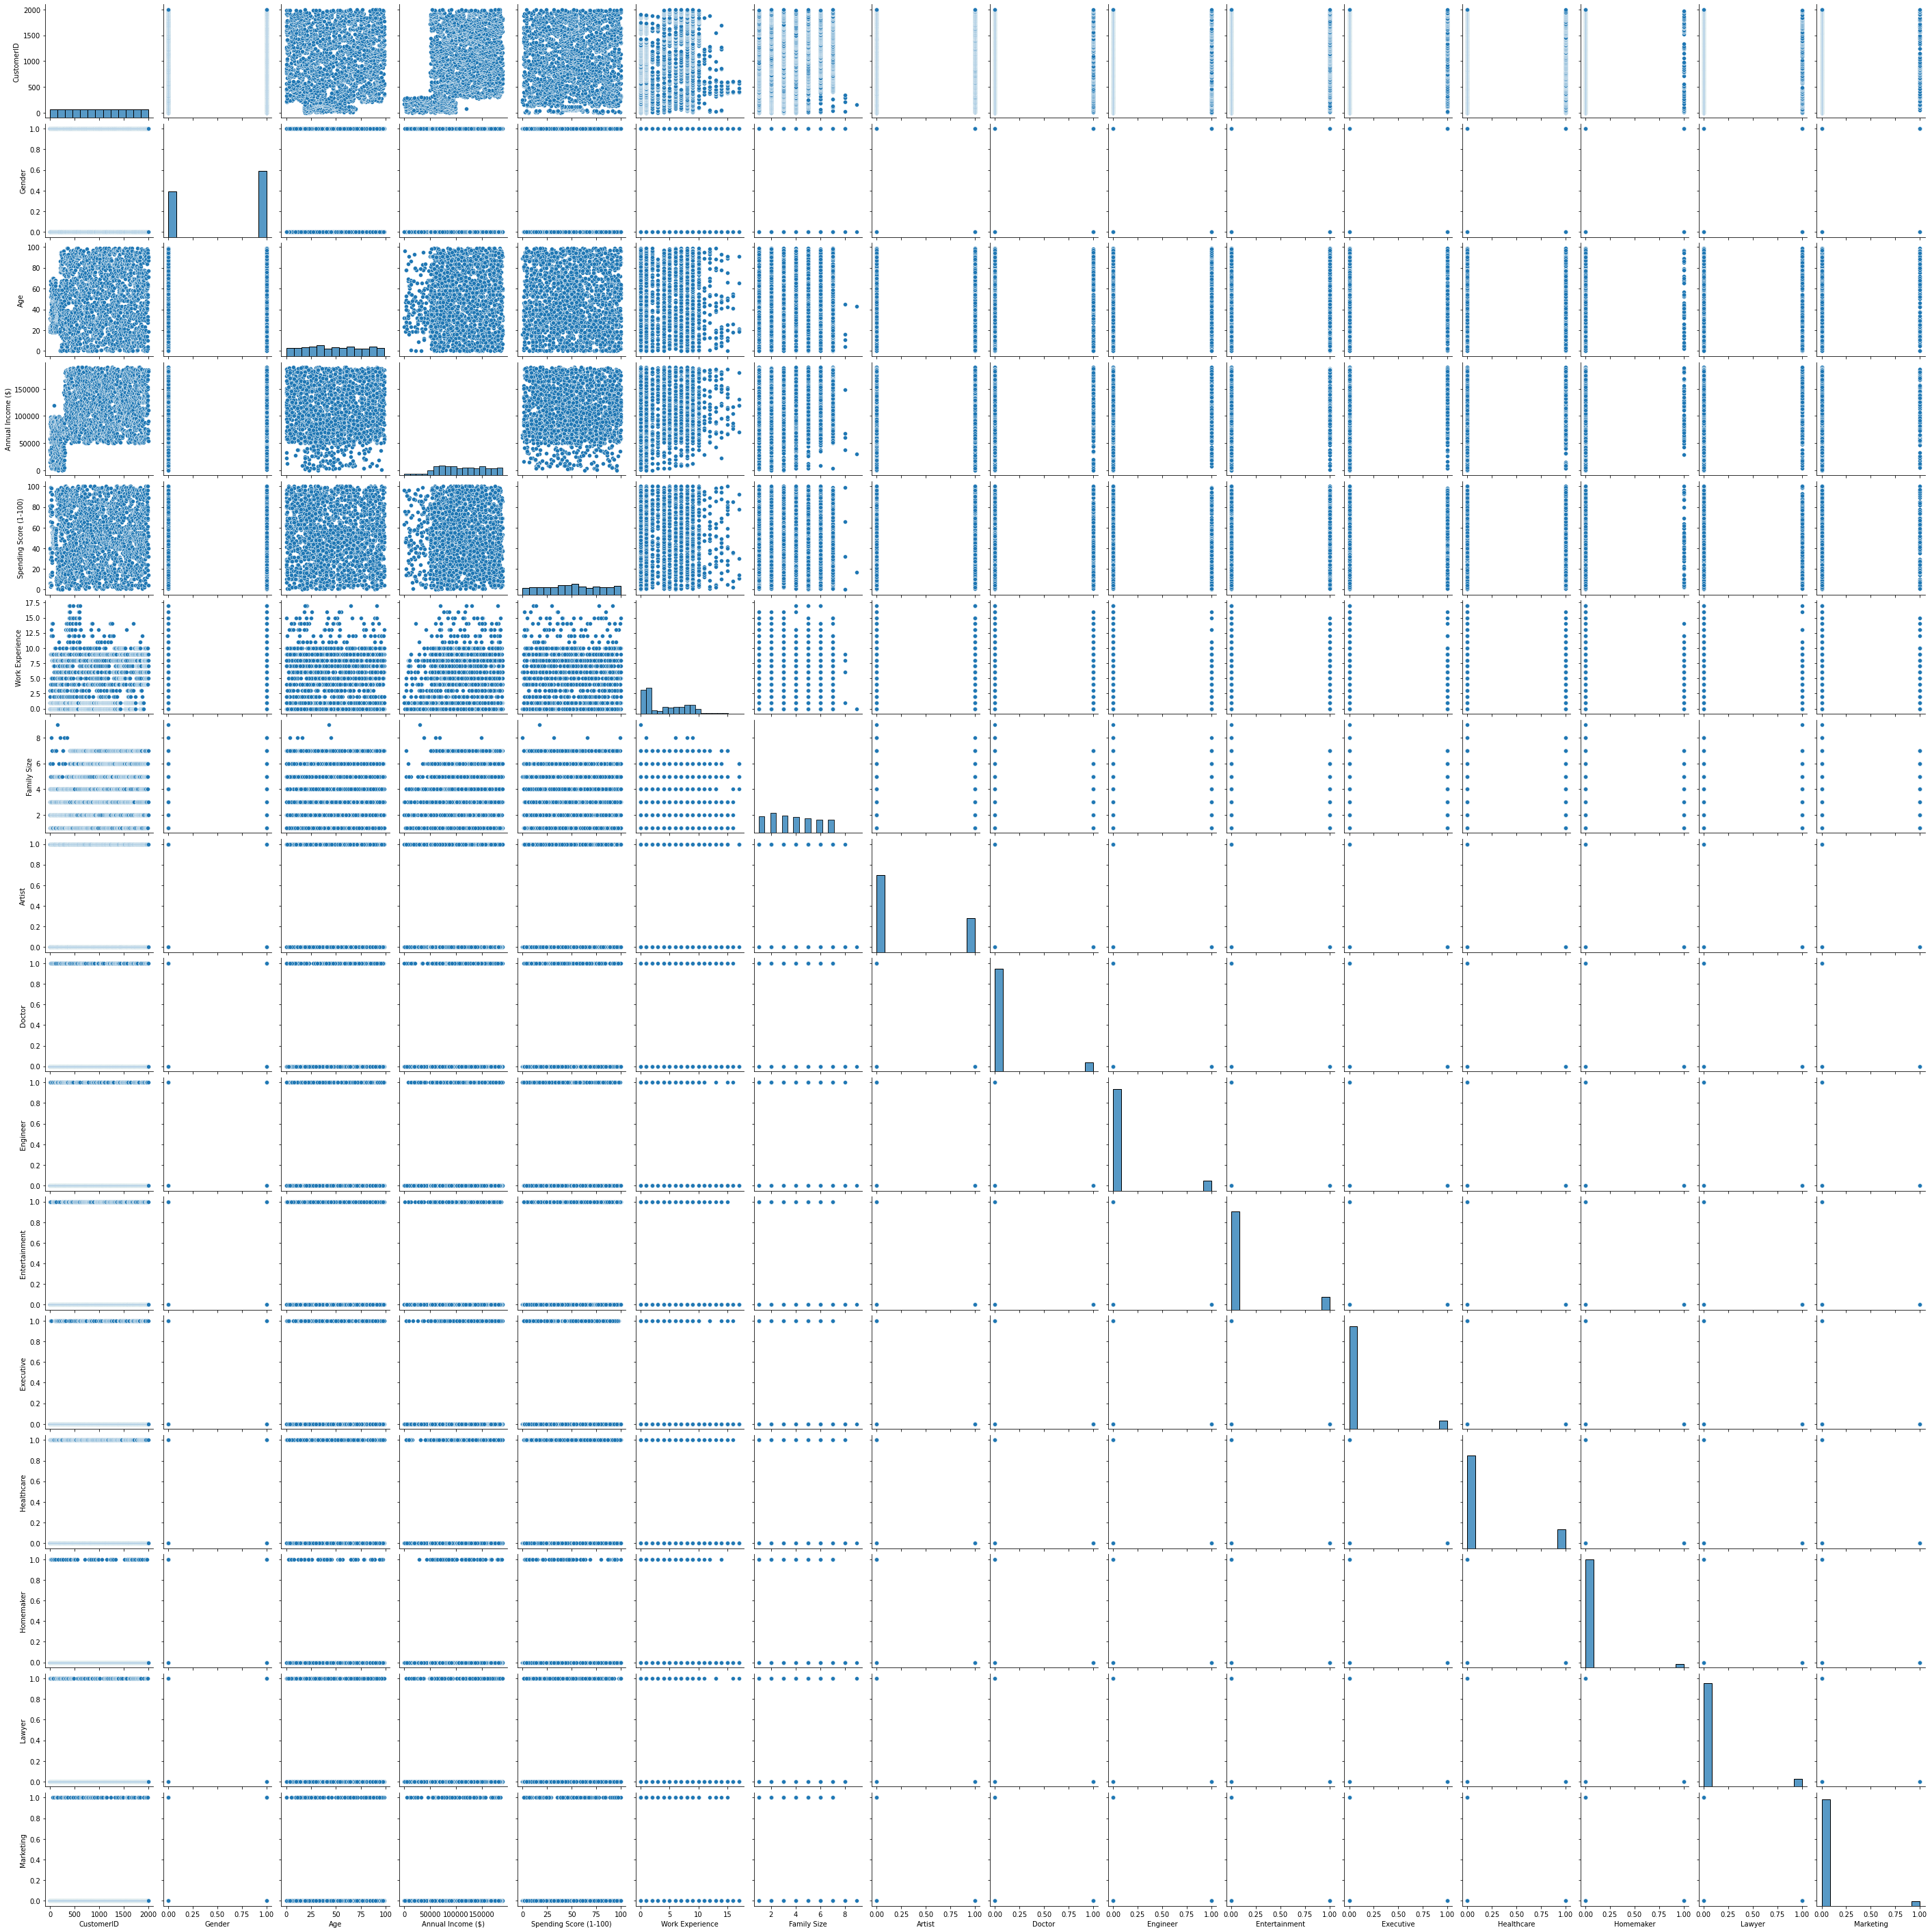

In [31]:
sns.pairplot(data)

<AxesSubplot:>

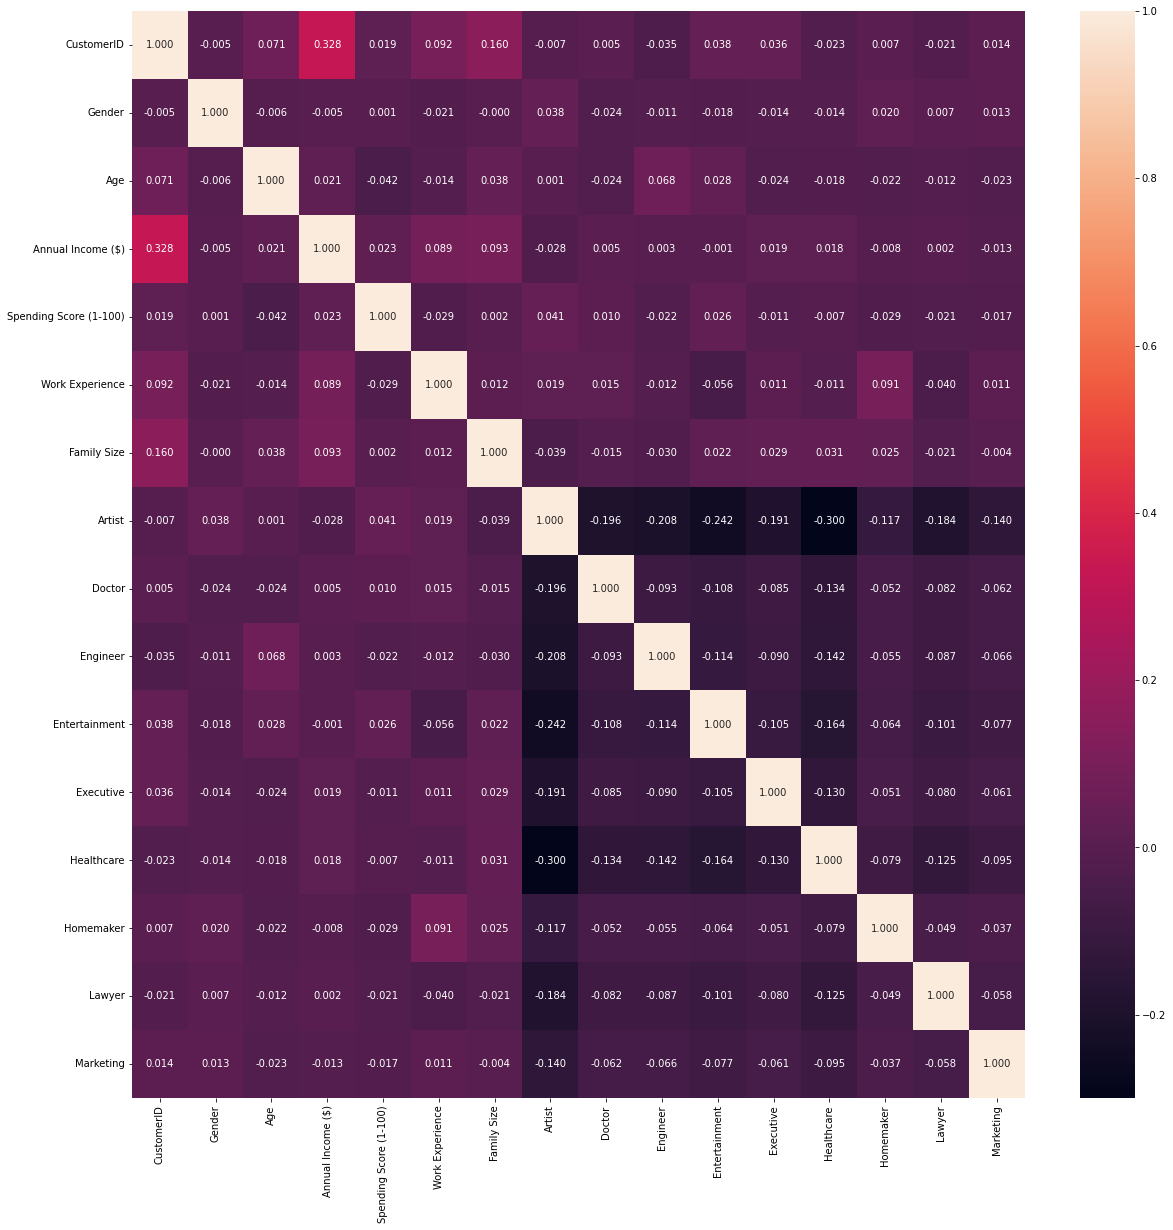

In [34]:
fig, ax = plt.subplots(figsize=(20,20))       
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<AxesSubplot:xlabel='Gender', ylabel='Annual Income ($)'>

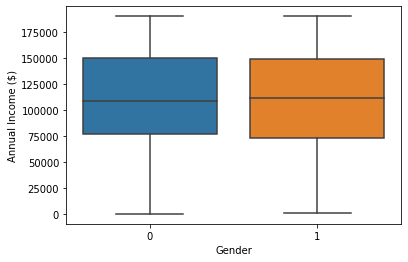

In [38]:
sns.boxplot( x=data["Gender"],y= data["Annual Income ($)"] )

D:\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

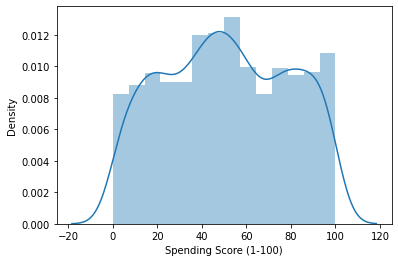

In [45]:
sns.distplot(data['Spending Score (1-100)'])